# Problem Statement:

Salaries in the field of data professions vary widely based on factors such as experience, job role, and
performance. Accurately predicting salaries for data professionals is essential for both job seekers and
employers.

**Dataset Overview:**
The dataset contains the following columns:
- `FIRST NAME`: First name
- `LAST NAME`: Last name
- `SEX`: Gender
- `DOJ`: Date of joining the company
- `CURRENT DATE`: Current date of data
- `DESIGNATION`: Job role/designation
- `AGE`: Age
- `SALARY`: Target variable, the salary of the data professional
- `UNIT`: Business unit or department
- `LEAVES USED`: Number of leaves used
- `LEAVES REMAINING`: Number of leaves remaining
- `RATINGS`: Ratings or performance ratings
- `PAST EXP`: Past work experience

# Importing Libraries

In [1]:
import pandas as pd, matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Exploratory Data Analysis (EDA)

In [2]:
#reading the dataset
data = pd.read_csv("Salary Prediction of Data Professions.csv")
data

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,ANNIE,NaN,F,NaN,01-07-2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,LEON,ABOULAHOUD,M,11-20-2014,01-07-2016,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2634,KATHERINE,ALSDON,F,6-28-2011,01-07-2016,Senior Manager,36.0,185977,Management,15.0,15.0,5.0,10
2635,LOUISE,ALTARAS,F,1-14-2014,01-07-2016,Analyst,23.0,45758,IT,17.0,13.0,2.0,0
2636,RENEE,ALVINO,F,1-23-2014,01-07-2016,Analyst,21.0,47315,Web,29.0,1.0,5.0,0
2637,TERI,ANASTASIO,F,3-17-2014,01-07-2016,Analyst,24.0,45172,Web,23.0,7.0,3.0,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2639 entries, 0 to 2638
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FIRST NAME        2639 non-null   object 
 1   LAST NAME         2637 non-null   object 
 2   SEX               2639 non-null   object 
 3   DOJ               2638 non-null   object 
 4   CURRENT DATE      2639 non-null   object 
 5   DESIGNATION       2639 non-null   object 
 6   AGE               2636 non-null   float64
 7   SALARY            2639 non-null   int64  
 8   UNIT              2639 non-null   object 
 9   LEAVES USED       2636 non-null   float64
 10  LEAVES REMAINING  2637 non-null   float64
 11  RATINGS           2637 non-null   float64
 12  PAST EXP          2639 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 268.2+ KB


In [4]:
data.shape

(2639, 13)

In [5]:
data.columns

Index(['FIRST NAME', 'LAST NAME', 'SEX', 'DOJ', 'CURRENT DATE', 'DESIGNATION',
       'AGE', 'SALARY', 'UNIT', 'LEAVES USED', 'LEAVES REMAINING', 'RATINGS',
       'PAST EXP'],
      dtype='object')

In [6]:
# Summary Statistics
data.describe()

,AGE,SALARY,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
count,2636.000000,2639.000000,2636.000000,2637.000000,2637.000000,2639.000000
mean,24.756449,58136.678287,22.501517,7.503223,3.486159,1.566881
std,3.908228,36876.956944,4.604469,4.603193,1.114933,2.728416
min,21.000000,40001.000000,15.000000,0.000000,2.000000,0.000000
25%,22.000000,43418.000000,19.000000,4.000000,2.000000,0.000000
50%,24.000000,46781.000000,22.000000,8.000000,3.000000,1.000000
75%,25.000000,51401.500000,26.000000,11.000000,4.000000,2.000000
max,45.000000,388112.000000,30.000000,15.000000,5.000000,23.000000


# Data Preprocessing

In [7]:
# checking missing values
data.isnull().sum() 

FIRST NAME          0
LAST NAME           2
SEX                 0
DOJ                 1
CURRENT DATE        0
DESIGNATION         0
AGE                 3
SALARY              0
UNIT                0
LEAVES USED         3
LEAVES REMAINING    2
RATINGS             2
PAST EXP            0
dtype: int64

In [8]:
#handling missing values by dropping them
df = data.dropna()

In [9]:
df.isnull().sum()

FIRST NAME          0
LAST NAME           0
SEX                 0
DOJ                 0
CURRENT DATE        0
DESIGNATION         0
AGE                 0
SALARY              0
UNIT                0
LEAVES USED         0
LEAVES REMAINING    0
RATINGS             0
PAST EXP            0
dtype: int64

In [10]:
df.head()

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
2,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
6,ELLIOT,AGULAR,M,09-02-2013,01-07-2016,Analyst,22.0,40339,Marketing,19.0,11.0,5.0,0
8,KATHY,ALSOP,F,6-29-2014,01-07-2016,Senior Analyst,28.0,63478,Operations,20.0,10.0,3.0,1


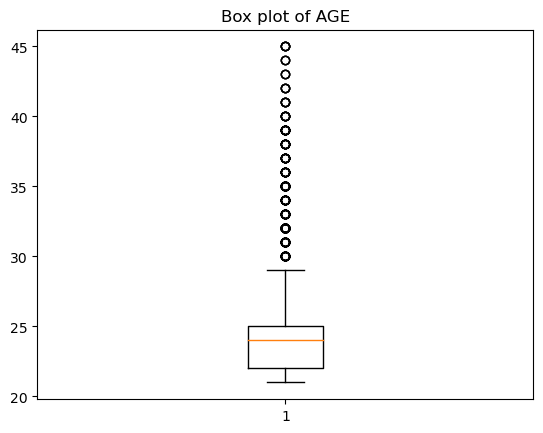

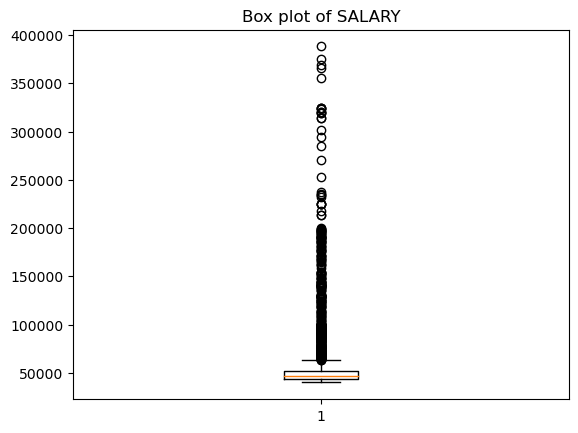

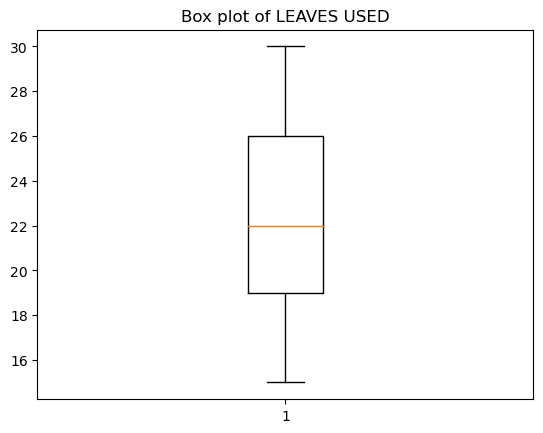

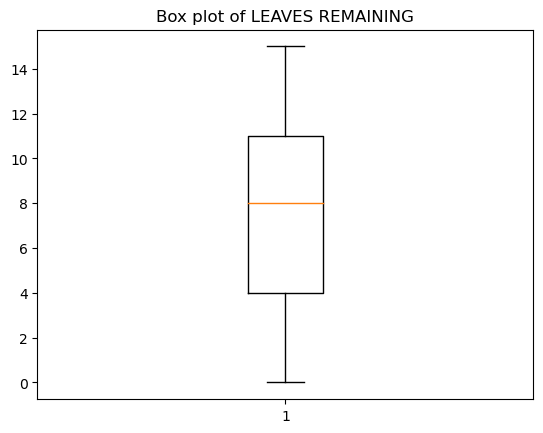

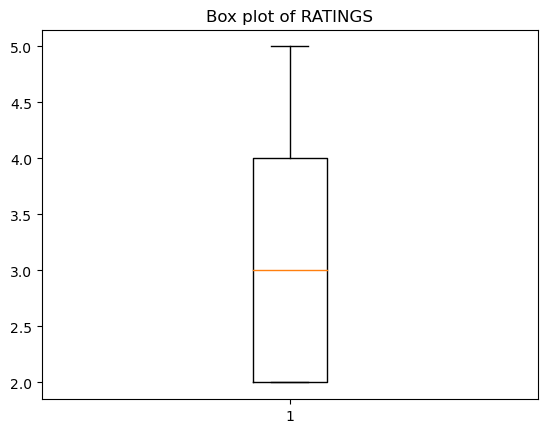

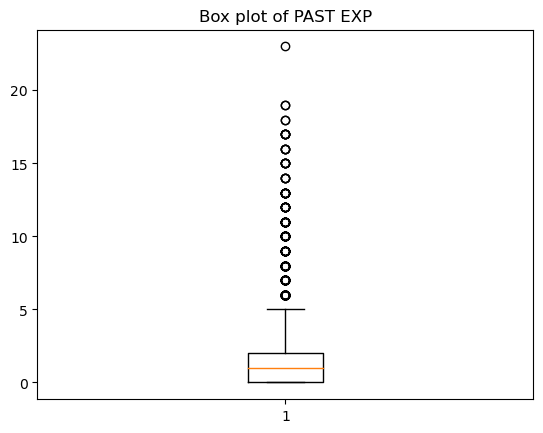

In [11]:
# check for outliers

# Box plot for 'AGE'
plt.boxplot(df['AGE'])
plt.title('Box plot of AGE')
plt.show()

# Box plot for 'SALARY'
plt.boxplot(df['SALARY'])
plt.title('Box plot of SALARY')
plt.show()

# Box plot for 'LEAVES USED'
plt.boxplot(df['LEAVES USED'])
plt.title('Box plot of LEAVES USED')
plt.show()

# Box plot for 'LEAVES REMAINING'
plt.boxplot(df['LEAVES REMAINING'])
plt.title('Box plot of LEAVES REMAINING')
plt.show()

# Box plot for 'RATINGS'
plt.boxplot(df['RATINGS'])
plt.title('Box plot of RATINGS')
plt.show()

# Box plot for 'PAST EXP'
plt.boxplot(df['PAST EXP'])
plt.title('Box plot of PAST EXP')
plt.show()

In [12]:
#Drop irrelevant columns
df.drop(columns=['FIRST NAME', 'LAST NAME'], inplace=True)

C:\Users\thees\AppData\Local\Temp\ipykernel_22920\490906461.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['FIRST NAME', 'LAST NAME'], inplace=True)


In [13]:
# Convert date columns to datetime
df['DOJ'] = pd.to_datetime(df['DOJ'])
df['CURRENT DATE'] = pd.to_datetime(df['CURRENT DATE'])

C:\Users\thees\AppData\Local\Temp\ipykernel_22920\270603533.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DOJ'] = pd.to_datetime(df['DOJ'])
C:\Users\thees\AppData\Local\Temp\ipykernel_22920\270603533.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CURRENT DATE'] = pd.to_datetime(df['CURRENT DATE'])


# Feature Engineering

In [14]:
# Derive new features from existing ones

# Calculate job tenure
df['TENURE'] = ((df['CURRENT DATE'] - df['DOJ']).dt.days / 365.25).round(1)   #365.25 is taken to account for leap years

# Calculate total years of experience
df['TOTAL EXP'] = (df['TENURE'] + df['PAST EXP']) 

# Calculate performance potential based on ratings and job tenure
df['PERFORMANCE POTENTIAL'] = df['RATINGS'] * df['TENURE']

C:\Users\thees\AppData\Local\Temp\ipykernel_22920\3366488950.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TENURE'] = ((df['CURRENT DATE'] - df['DOJ']).dt.days / 365.25).round(1)   #365.25 is taken to account for leap years
C:\Users\thees\AppData\Local\Temp\ipykernel_22920\3366488950.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TOTAL EXP'] = (df['TENURE'] + df['PAST EXP'])
C:\Users\thees\AppData\Local\Temp\ipykernel_22920\3366488950.py:10: SettingWithCopyWarning: 
A value is trying to b

In [86]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
scaled_features = scaler.fit_transform(df[['SALARY', 'PAST EXP', 'TOTAL EXP', 'TENURE']]) 

# Convert scaled_features back to DataFrame
scaled_df = pd.DataFrame(scaled_features, columns=['SALARY', 'PAST EXP', 'TOTAL EXP', 'TENURE'])
scaled_df


,SALARY,PAST EXP,TOTAL EXP,TENURE
0,-0.367536,-0.573447,-0.705891,-0.659407
1,-0.465608,-0.573447,-0.771441,-0.882617
2,-0.340949,-0.573447,-0.312590,0.679853
3,-0.482319,-0.573447,-0.476465,0.121828
4,0.145422,-0.206536,-0.410915,-0.771012
...,...,...,...,...
2626,3.468715,3.095666,3.522091,2.577139
2627,-0.335307,-0.573447,-0.574790,-0.212987
2628,-0.293067,-0.573447,-0.574790,-0.212987
2629,-0.351204,-0.206536,-0.312590,-0.436197


In [16]:
df.head()

,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,TENURE,TOTAL EXP,PERFORMANCE POTENTIAL
0,F,2014-05-18,2016-01-07,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0,1.6,1.6,3.2
2,F,2014-07-28,2016-01-07,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0,1.4,1.4,4.2
3,F,2013-04-03,2016-01-07,Analyst,22.0,45550,IT,22.0,8.0,3.0,0,2.8,2.8,8.4
6,M,2013-09-02,2016-01-07,Analyst,22.0,40339,Marketing,19.0,11.0,5.0,0,2.3,2.3,11.5
8,F,2014-06-29,2016-01-07,Senior Analyst,28.0,63478,Operations,20.0,10.0,3.0,1,1.5,2.5,4.5


# Data Visualization

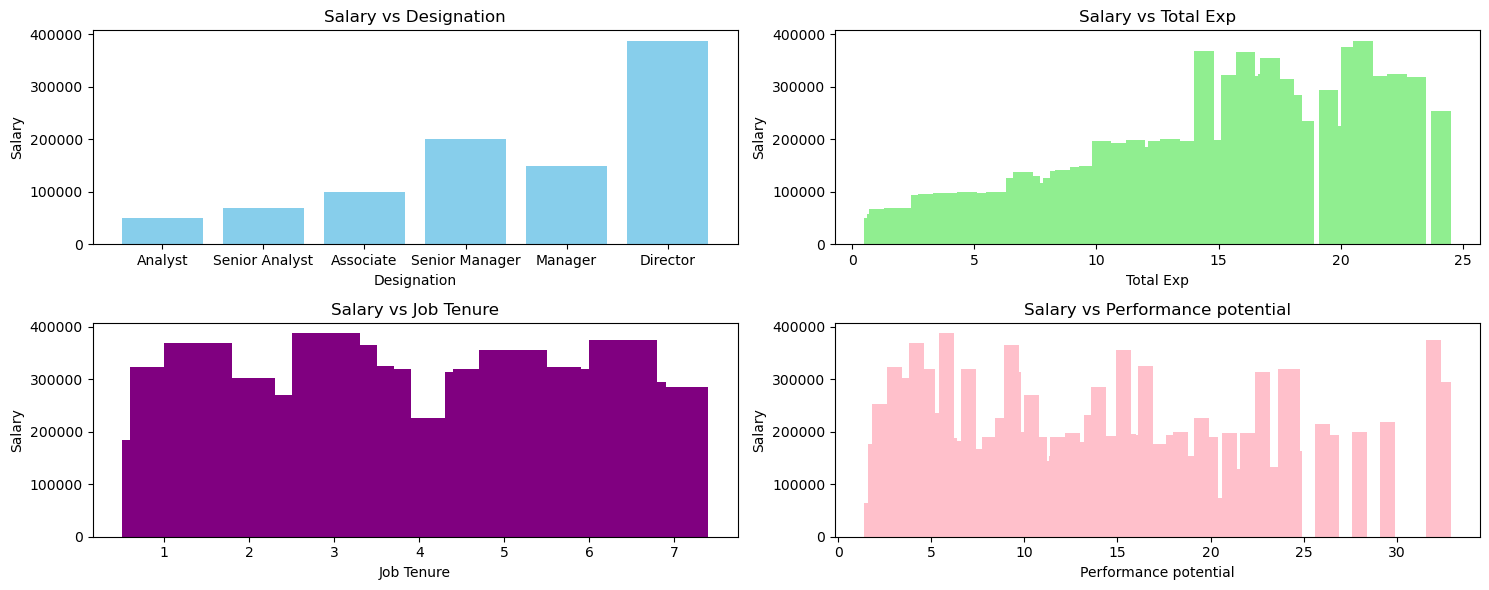

In [17]:
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 6))

# Flatten the axes array
axes = axes.flatten()

# Plot Salary against Past Exp
axes[0].bar(df['DESIGNATION'], df['SALARY'], color='skyblue')
axes[0].set_title('Salary vs Designation')
axes[0].set_xlabel('Designation')
axes[0].set_ylabel('Salary')

# Plot Salary against Total Exp
axes[1].bar(df['TOTAL EXP'], df['SALARY'], color='lightgreen')
axes[1].set_title('Salary vs Total Exp')
axes[1].set_xlabel('Total Exp')
axes[1].set_ylabel('Salary')

# Plot Salary against Tenure
axes[2].bar(df['TENURE'], df['SALARY'], color='purple')
axes[2].set_title('Salary vs Job Tenure')
axes[2].set_xlabel('Job Tenure')
axes[2].set_ylabel('Salary')

# Plot Salary against Performance potential
axes[3].bar(df['PERFORMANCE POTENTIAL'], df['SALARY'], color='pink')
axes[3].set_title('Salary vs Performance potential')
axes[3].set_xlabel('Performance potential')
axes[3].set_ylabel('Salary')

plt.tight_layout()
plt.show()

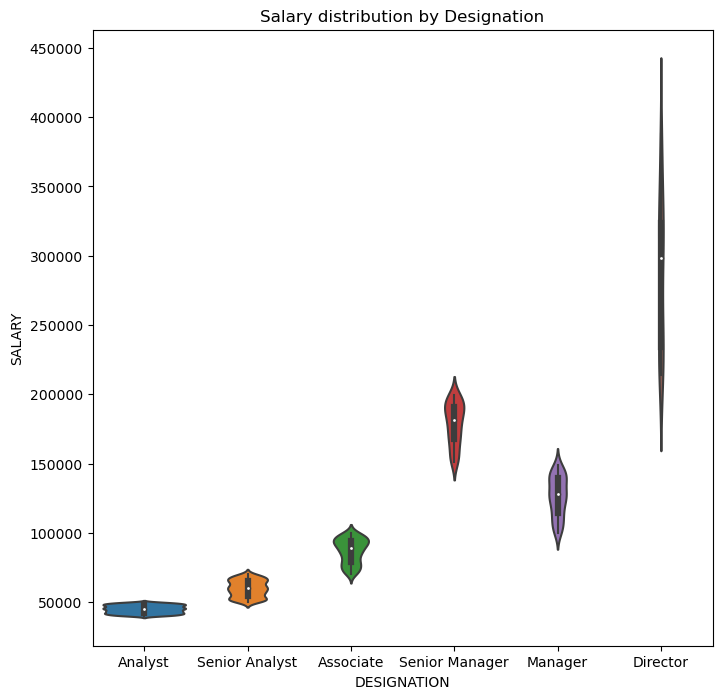

In [18]:
plt.figure(figsize=(8, 8))
sns.violinplot(x='DESIGNATION', y='SALARY', data=df)
plt.title('Salary distribution by Designation')
plt.xlabel('DESIGNATION')
plt.ylabel('SALARY')
plt.show()

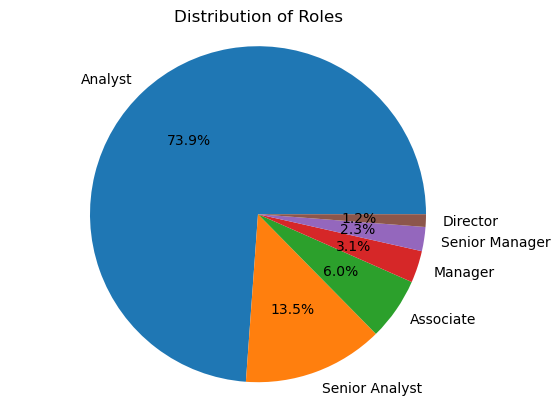

In [19]:
roles = df["DESIGNATION"].value_counts().index
people = df["DESIGNATION"].value_counts()

plt.pie(people, labels=roles, autopct='%1.1f%%')
plt.title('Distribution of Roles')
plt.axis('equal')
plt.show()

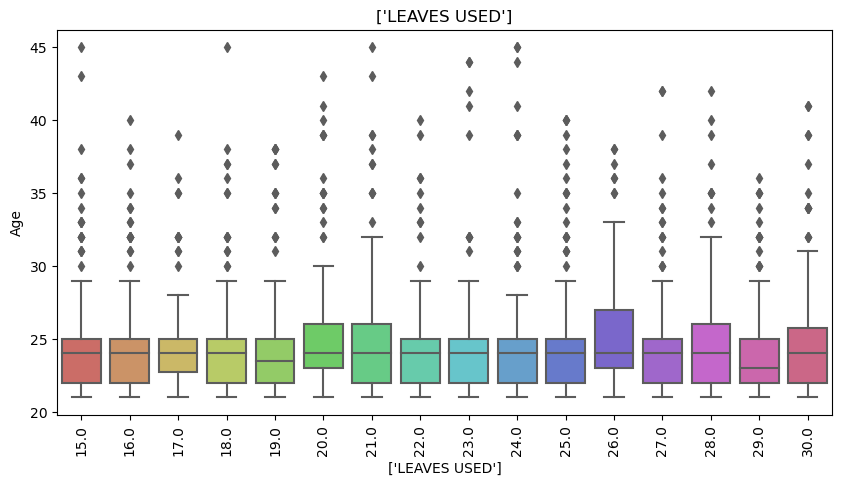

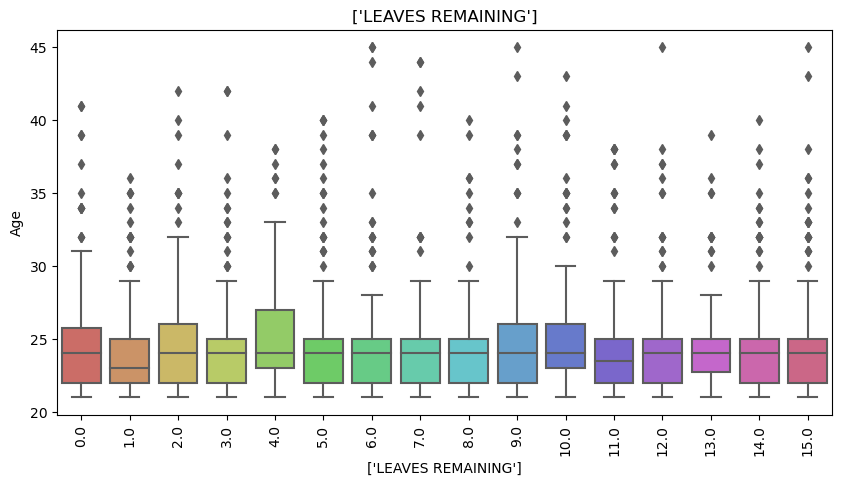

In [20]:
for i in ['LEAVES USED','LEAVES REMAINING']:
    plt.figure(figsize=(10,5))
    sns.boxplot(data=df,x=df[i],y='AGE',palette='hls')
    plt.title([i])
    plt.xlabel([i])
    plt.xticks(rotation=90)
    plt.ylabel('Age')
    plt.show()

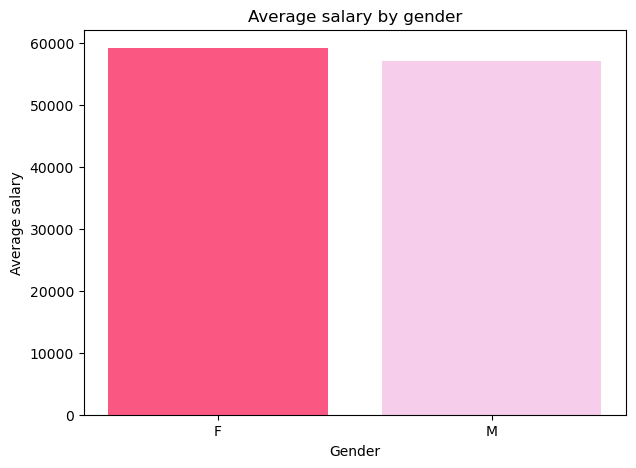

In [21]:
# Find the average salary against sex
avg_salary = df.groupby('SEX')['SALARY'].mean().sort_values(ascending=False)

plt.figure(figsize=(7,5))
plt.bar(avg_salary.index, avg_salary.values, color=['#FA5882','#F6CEEC'])
plt.title("Average salary by gender")
plt.xlabel('Gender')
plt.ylabel("Average salary")
plt.show()

In [22]:
data.UNIT.unique()

array(['Finance', 'Web', 'IT', 'Operations', 'Marketing', 'Management'],
      dtype=object)

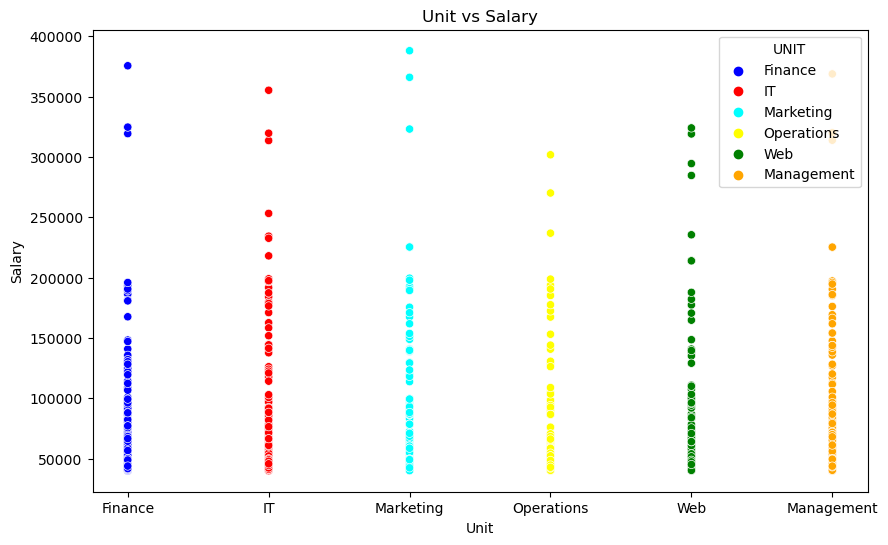

In [23]:
# scatter plot of salary against unit
colors = {'Finance': 'blue', 'Web': 'green', 'IT': 'red', 'Operations' : 'yellow', 'Marketing' : 'cyan', 'Management' : 'orange'}

plt.figure(figsize=(10, 6))
sns.scatterplot(x='UNIT', y='SALARY', data=df, hue='UNIT', palette=colors)
plt.title('Unit vs Salary')
plt.xlabel('Unit')
plt.ylabel('Salary')
plt.show()

C:\Users\thees\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


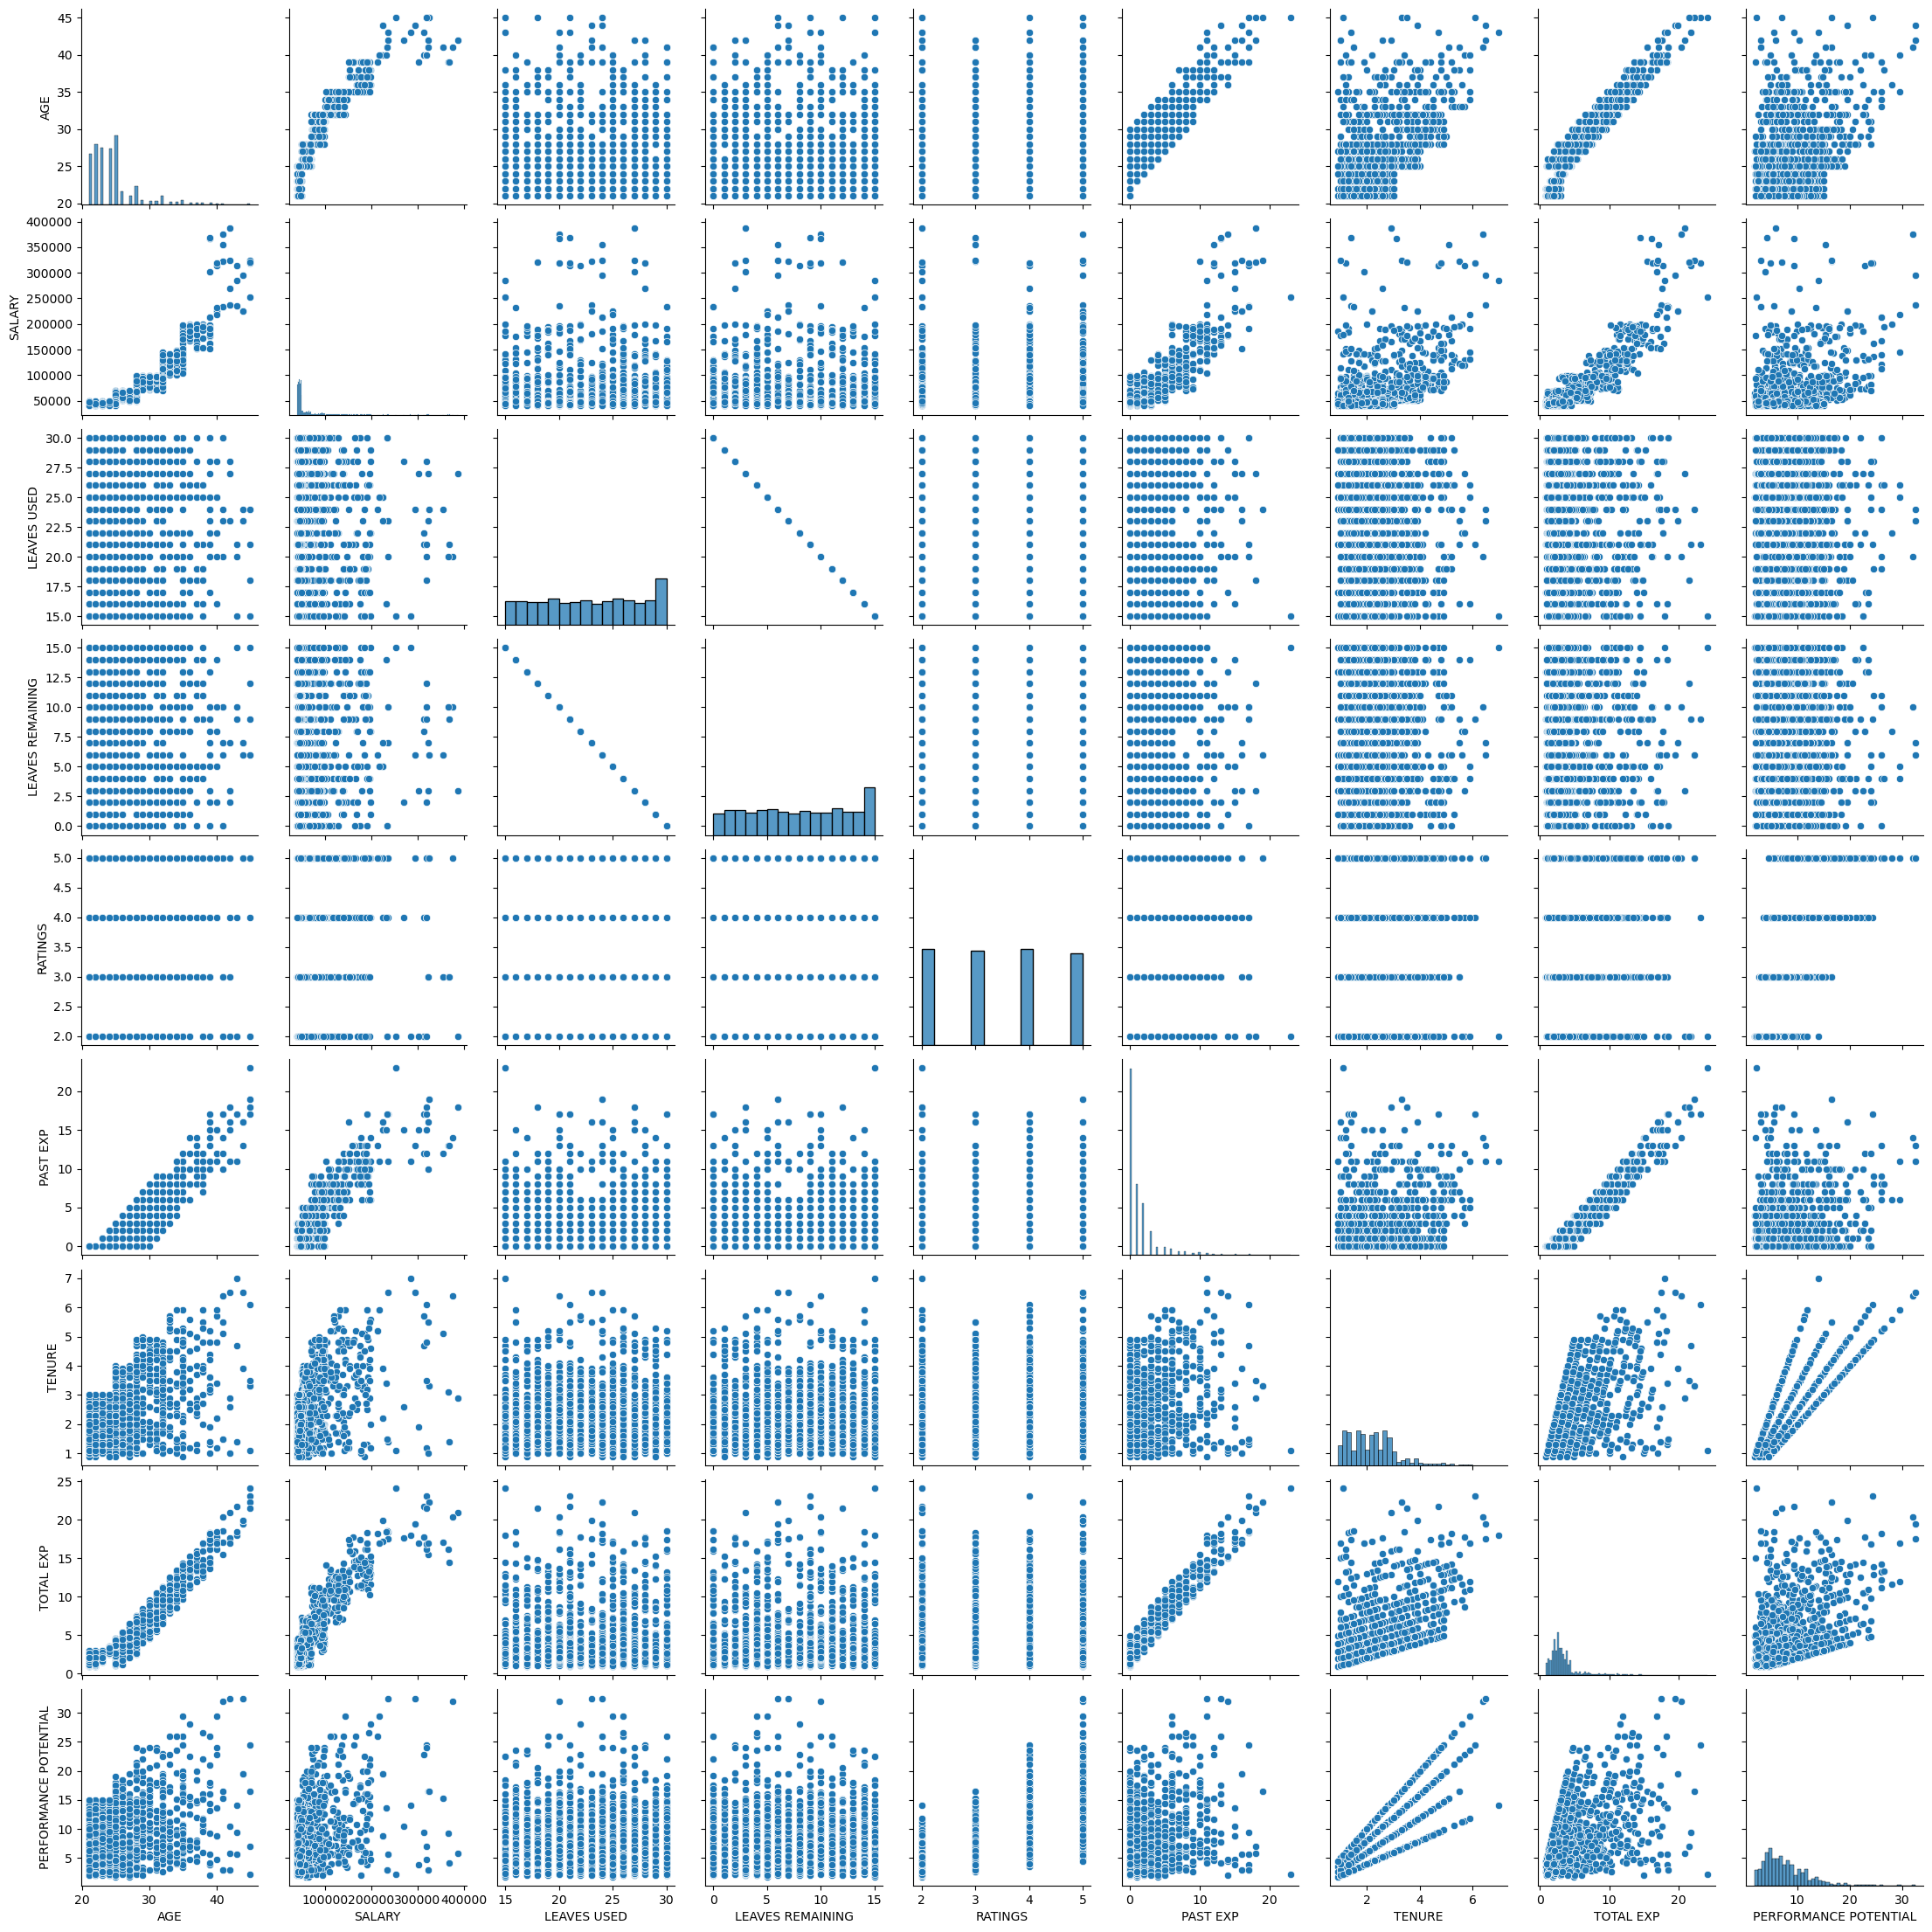

In [24]:
# Visualize pairplot
sns.pairplot(df)
plt.show()

# Encoding

In [25]:
#Label encoding for SEX
le = LabelEncoder()
df['SEX'] = le.fit_transform(df['SEX'])

C:\Users\thees\AppData\Local\Temp\ipykernel_22920\971340516.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SEX'] = le.fit_transform(df['SEX'])


In [26]:
# One-hot encode DESIGNATION and UNIT columns
df = pd.get_dummies(df, columns=['DESIGNATION', 'UNIT'])

In [27]:
df.head()

,SEX,DOJ,CURRENT DATE,AGE,SALARY,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,TENURE,...,DESIGNATION_Director,DESIGNATION_Manager,DESIGNATION_Senior Analyst,DESIGNATION_Senior Manager,UNIT_Finance,UNIT_IT,UNIT_Management,UNIT_Marketing,UNIT_Operations,UNIT_Web
0,0,2014-05-18,2016-01-07,21.0,44570,24.0,6.0,2.0,0,1.6,...,False,False,False,False,True,False,False,False,False,False
2,0,2014-07-28,2016-01-07,21.0,40955,23.0,7.0,3.0,0,1.4,...,False,False,False,False,True,False,False,False,False,False
3,0,2013-04-03,2016-01-07,22.0,45550,22.0,8.0,3.0,0,2.8,...,False,False,False,False,False,True,False,False,False,False
6,1,2013-09-02,2016-01-07,22.0,40339,19.0,11.0,5.0,0,2.3,...,False,False,False,False,False,False,False,True,False,False
8,0,2014-06-29,2016-01-07,28.0,63478,20.0,10.0,3.0,1,1.5,...,False,False,True,False,False,False,False,False,True,False


# Correlation

In [28]:
# Calculate the correlation matrix
correlation_matrix = df.corr()
df.corr()

,SEX,DOJ,CURRENT DATE,AGE,SALARY,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,TENURE,...,DESIGNATION_Director,DESIGNATION_Manager,DESIGNATION_Senior Analyst,DESIGNATION_Senior Manager,UNIT_Finance,UNIT_IT,UNIT_Management,UNIT_Marketing,UNIT_Operations,UNIT_Web
SEX,1.000000,0.007402,NaN,-0.016458,-0.028537,0.010609,-0.010609,-0.038273,-0.022794,-0.008464,...,-0.032615,0.009922,0.011814,-0.019865,-0.021004,0.024588,-0.003186,0.014436,0.005249,-0.020630
DOJ,0.007402,1.000000,NaN,-0.458590,-0.434990,-0.013482,0.013482,-0.016291,-0.220671,-0.999472,...,-0.192228,-0.235016,-0.111842,-0.223847,-0.014012,0.031394,-0.004481,-0.035034,0.026902,-0.005441
CURRENT DATE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AGE,-0.016458,-0.458590,NaN,1.000000,0.871929,0.007143,-0.007143,0.039134,0.903659,0.458553,...,0.481273,0.389941,0.169148,0.476117,0.014049,-0.000315,0.021214,0.012277,-0.035804,-0.011363
SALARY,-0.028537,-0.434990,NaN,0.871929,1.000000,0.006850,-0.006850,0.021702,0.854024,0.434883,...,0.688915,0.329538,0.019142,0.505073,0.003087,0.011380,0.012733,0.015342,-0.031619,-0.011116
LEAVES USED,0.010609,-0.013482,NaN,0.007143,0.006850,1.000000,-1.000000,0.004352,0.007832,0.012989,...,0.012841,0.014634,-0.001817,-0.021084,0.002003,-0.044659,-0.000434,-0.002537,0.046176,0.000351
LEAVES REMAINING,-0.010609,0.013482,NaN,-0.007143,-0.006850,-1.000000,1.000000,-0.004352,-0.007832,-0.012989,...,-0.012841,-0.014634,0.001817,0.021084,-0.002003,0.044659,0.000434,0.002537,-0.046176,-0.000351
RATINGS,-0.038273,-0.016291,NaN,0.039134,0.021702,0.004352,-0.004352,1.000000,0.042497,0.014821,...,0.020020,-0.006729,0.001799,0.027938,-0.015013,0.000186,0.021540,-0.008366,0.016865,-0.014999
PAST EXP,-0.022794,-0.220671,NaN,0.903659,0.854024,0.007832,-0.007832,0.042497,1.000000,0.220771,...,0.544520,0.353128,-0.009538,0.494534,0.014325,0.014710,0.018100,0.006216,-0.039716,-0.013952
TENURE,-0.008464,-0.999472,NaN,0.458553,0.434883,0.012989,-0.012989,0.014821,0.220771,1.000000,...,0.192697,0.234620,0.111315,0.223690,0.013326,-0.031702,0.005063,0.035017,-0.027238,0.006230


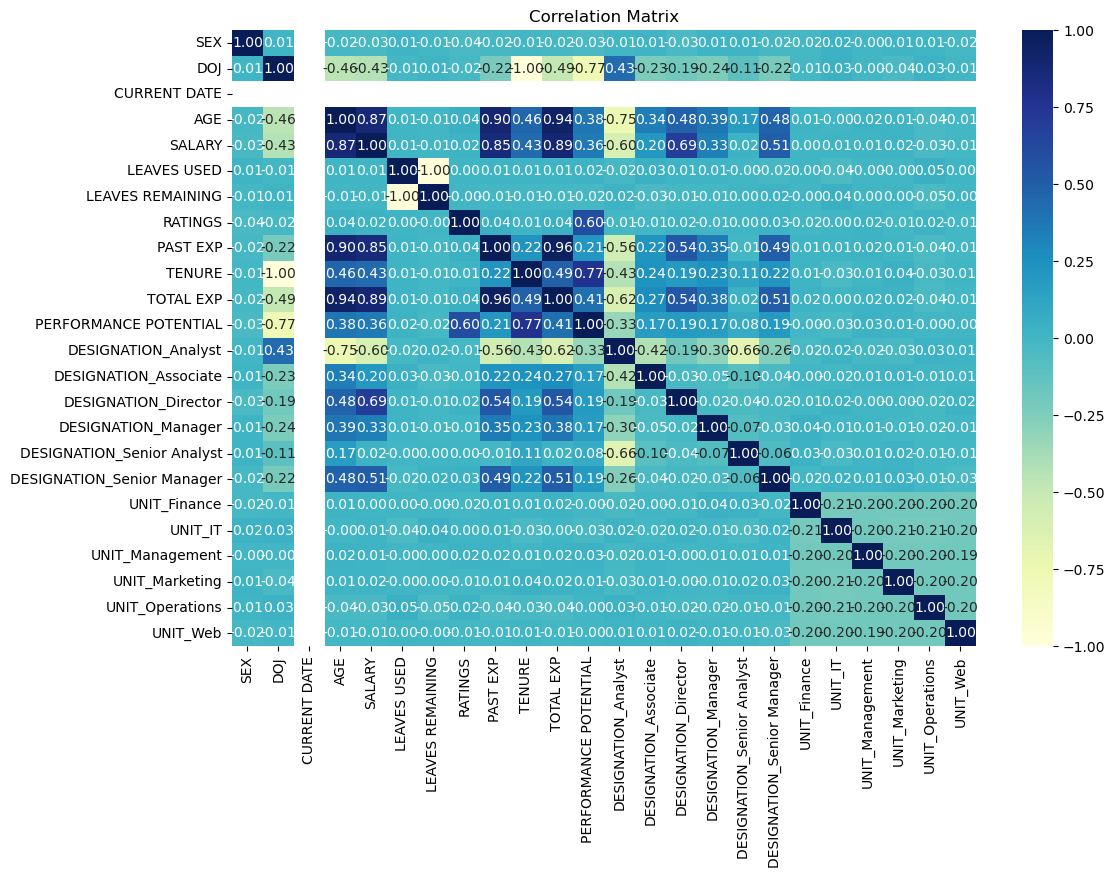

In [29]:
# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [30]:
# Correlation of features with SALARY
salary_correlations = correlation_matrix['SALARY'].sort_values(ascending=False)

print(salary_correlations)

SALARY                        1.000000
TOTAL EXP                     0.890586
AGE                           0.871929
PAST EXP                      0.854024
DESIGNATION_Director          0.688915
DESIGNATION_Senior Manager    0.505073
TENURE                        0.434883
PERFORMANCE POTENTIAL         0.360275
DESIGNATION_Manager           0.329538
DESIGNATION_Associate         0.199360
RATINGS                       0.021702
DESIGNATION_Senior Analyst    0.019142
UNIT_Marketing                0.015342
UNIT_Management               0.012733
UNIT_IT                       0.011380
LEAVES USED                   0.006850
UNIT_Finance                  0.003087
LEAVES REMAINING             -0.006850
UNIT_Web                     -0.011116
SEX                          -0.028537
UNIT_Operations              -0.031619
DOJ                          -0.434990
DESIGNATION_Analyst          -0.597017
CURRENT DATE                       NaN
Name: SALARY, dtype: float64


In [89]:
# set x and y values for test-train split
X = df.drop(["SALARY",'DOJ', 'CURRENT DATE'], axis = 1)
Y = df["SALARY"]

In [90]:
df.dtypes

SEX                                    int32
DOJ                           datetime64[ns]
CURRENT DATE                  datetime64[ns]
AGE                                  float64
SALARY                                 int64
LEAVES USED                          float64
LEAVES REMAINING                     float64
RATINGS                              float64
PAST EXP                               int64
TENURE                               float64
TOTAL EXP                            float64
PERFORMANCE POTENTIAL                float64
DESIGNATION_Analyst                     bool
DESIGNATION_Associate                   bool
DESIGNATION_Director                    bool
DESIGNATION_Manager                     bool
DESIGNATION_Senior Analyst              bool
DESIGNATION_Senior Manager              bool
UNIT_Finance                            bool
UNIT_IT                                 bool
UNIT_Management                         bool
UNIT_Marketing                          bool
UNIT_Opera

# Splitting the Dataset into Train & Test datasets

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, shuffle = True)

In [93]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(2104, 21)
(527, 21)
(2104,)
(527,)


# Machine Learning Model Development

In [94]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [95]:
# Create a function for machine learning modeling 
def machine_learning_model(model,X_train,X_test,Y_train,Y_test):
    print(f'The {model} ')
    model.fit(X_train,Y_train)
    y_pred = model.predict(X_test)
    print(f'\nMSE score of the {model} model is {mean_squared_error(Y_test, y_pred) :.2f}')
    print(f'\nMAE score of the {model} model is {mean_absolute_error(Y_test, y_pred) :.2f}')
    print(f'\nR2 score of the {model} model is {r2_score(Y_test, y_pred) :.2f}')
    print('-'*80)
    

In [96]:
models={
    'linear':LinearRegression(),
    'knn':KNeighborsRegressor(),
    'decison':DecisionTreeRegressor(criterion='squared_error'),
    'random forest':RandomForestRegressor(n_estimators=50,criterion='squared_error'),
    'ada':AdaBoostRegressor(),
    'gradient boost':GradientBoostingRegressor()
}

# Model Evaulation:

In [97]:
for i in range(len(models)):
    model_names = list(models.values())[i]
    names = list(models.keys())[i]
    machine_learning_model(model_names,X_train,X_test,Y_train,Y_test)

The LinearRegression() 

MSE score of the LinearRegression() model is 46345886.14

MAE score of the LinearRegression() model is 4019.38

R2 score of the LinearRegression() model is 0.96
--------------------------------------------------------------------------------
The KNeighborsRegressor() 

MSE score of the KNeighborsRegressor() model is 134900264.81

MAE score of the KNeighborsRegressor() model is 5344.52

R2 score of the KNeighborsRegressor() model is 0.89
--------------------------------------------------------------------------------
The DecisionTreeRegressor() 

MSE score of the DecisionTreeRegressor() model is 114658322.54

MAE score of the DecisionTreeRegressor() model is 5153.02

R2 score of the DecisionTreeRegressor() model is 0.91
--------------------------------------------------------------------------------
The RandomForestRegressor(n_estimators=50) 

MSE score of the RandomForestRegressor(n_estimators=50) model is 64479114.38

MAE score of the RandomForestRegressor(n_e

# Conclusion:

From the output of different regression models, we can draw several conclusions regarding their performance for predicting salary:

**1) Linear Regression:**

It achieved the lowest MSE score of 46,345,886.14 among all models, indicating a relatively small average squared difference between predicted and actual salaries.
The MAE score is 4,019.38, which suggests that, on average, the model's predictions are off by approximately $4,019.38.
The R2 score of 0.96 indicates that 96% of the variance in the target variable (salary) is explained by the independent variables included in the model. This suggests that the model fits the data well.

**2) KNeighbors Regressor:**

It has a higher MSE score of 134,900,264.81 compared to Linear Regression, indicating larger prediction errors on average.
The MAE score is 5,344.52, which is higher than that of Linear Regression, indicating a higher average absolute difference between predicted and actual salaries.
The R2 score of 0.89 indicates that the model explains 89% of the variance in the target variable, which is slightly lower than Linear Regression.

**3) Decision Tree Regressor:**

It achieved an MSE score of 112,993,164.16, which is higher than Linear Regression but lower than KNeighbors Regressor.
The MAE score is 5,066.31, indicating a similar level of average absolute difference as KNeighbors Regressor.
The R2 score of 0.91 suggests that the model explains 91% of the variance in the target variable.

**4) Random Forest Regressor:**

It has an MSE score of 64,043,236.10, which is lower than both KNeighbors Regressor and Decision Tree Regressor.
The MAE score is 4,186.80, indicating a lower average absolute difference compared to KNeighbors Regressor and Decision Tree Regressor.
The R2 score of 0.95 indicates that the model explains 95% of the variance in the target variable.

**5) AdaBoost Regressor and Gradient Boosting Regressor:**

Both AdaBoost and Gradient Boosting achieved similar performance.
They have MSE scores of 64,613,426.05 and 62,142,672.18, respectively, which are comparable to Random Forest Regressor.
Their MAE scores are around 4,800 to 4,200, indicating a similar level of average absolute difference.
The R2 scores of around 0.95 indicate that these models explain 95% of the variance in the target variable, similar to Random Forest Regressor.

*In summary, based on the provided metrics, Linear Regression appears to perform slightly better in terms of MSE and MAE compared to the other models. However, Random Forest, AdaBoost, and Gradient Boosting also demonstrate strong performance with similar R2 scores and slightly higher MSE and MAE values. It's essential to consider both the accuracy and interpretability of the models when selecting the most appropriate model for salary prediction.*


**Based on the provided evaluation metrics, the models can be ranked from best to worst performance as follows:**

**Linear Regression > Random Forest Regressor > AdaBoost Regressor > Gradient Boosting Regressor > Decision Tree Regressor > KNeighbors Regressor**



